# Exploratory Data Analysis

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

#### Loading the data set: Data Ingestion

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("/home/omkar/Omkar Pawar/Data Science/Projects/Diamonds Price Predictions/notebooks/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values in our dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


We will reduce the number of entries to 15k so we can process this data graphically. We will take random values from our dataset to perform further analysis. 

(Note: Taking this decision due to low spec computer else we can take the whole data.)

In [15]:
back_up_df = df # Keeping the original dataframe just in case we need it in future.

In [16]:
df = df.sample(n=15000, random_state=47)
df.head() 

,id,carat,cut,color,clarity,depth,table,x,y,z,price
80639,80639,0.33,Premium,E,SI1,62.6,59.0,4.40,4.45,2.77,743
180511,180511,0.72,Premium,I,VS1,61.1,56.0,5.82,5.77,3.54,2564
163826,163826,0.72,Ideal,F,SI2,61.3,56.0,5.76,5.74,3.52,2364
146615,146615,0.56,Ideal,D,VS2,60.7,56.0,5.33,5.37,3.25,1963
74483,74483,1.70,Ideal,I,VS2,61.2,55.0,7.67,7.62,4.66,10872


* Checking for duplicate values:

In [17]:
df.duplicated().sum()

0

We don't have duplicates in the dataset, so we can move ahead with the analysis.

* Segregating Numerical and Categorical Columns:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 80639 to 152846
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       15000 non-null  int64  
 1   carat    15000 non-null  float64
 2   cut      15000 non-null  object 
 3   color    15000 non-null  object 
 4   clarity  15000 non-null  object 
 5   depth    15000 non-null  float64
 6   table    15000 non-null  float64
 7   x        15000 non-null  float64
 8   y        15000 non-null  float64
 9   z        15000 non-null  float64
 10  price    15000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.4+ MB


We can also drop id column as it won't be useful us to give any insights.

In [30]:
df.drop('id', axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 80639 to 152846
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    15000 non-null  float64
 1   cut      15000 non-null  object 
 2   color    15000 non-null  object 
 3   clarity  15000 non-null  object 
 4   depth    15000 non-null  float64
 5   table    15000 non-null  float64
 6   x        15000 non-null  float64
 7   y        15000 non-null  float64
 8   z        15000 non-null  float64
 9   price    15000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [31]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']

print(f"Numerical columns: {numerical_columns} \n-----------\ncategorical columns: {categorical_columns}")

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object') 
-----------
categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [32]:
df[categorical_columns].describe()

,cut,color,clarity
count,15000,15000,15000
unique,5,7,8
top,Ideal,G,SI1
freq,7191,3459,4168


There are 5 types of unique cuts, 7 types of unique colors and 7 types of unique clarity levels in data frame.

In [33]:
df['cut'].value_counts()

cut
Ideal        7191
Premium      3807
Very Good    2912
Good          954
Fair          136
Name: count, dtype: int64

In [34]:
df['color'].value_counts()

color
G    3459
E    2731
F    2717
H    2375
D    1851
I    1348
J     519
Name: count, dtype: int64

In [35]:
df['clarity'].value_counts()

clarity
SI1     4168
VS2     3745
VS1     2389
SI2     2319
VVS2    1197
VVS1     812
IF       334
I1        36
Name: count, dtype: int64

#### Graphical Analysis:

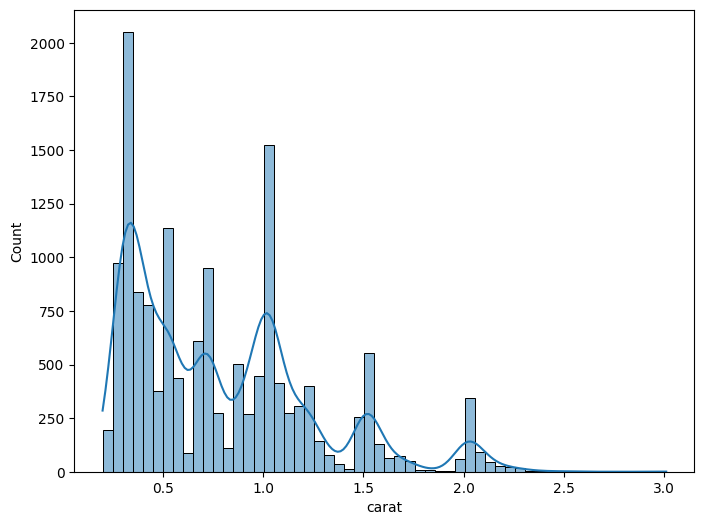

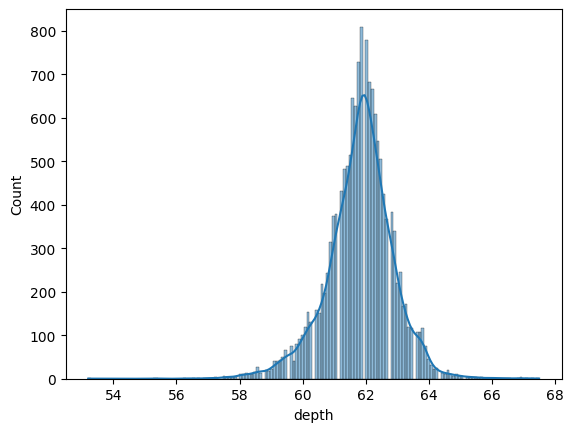

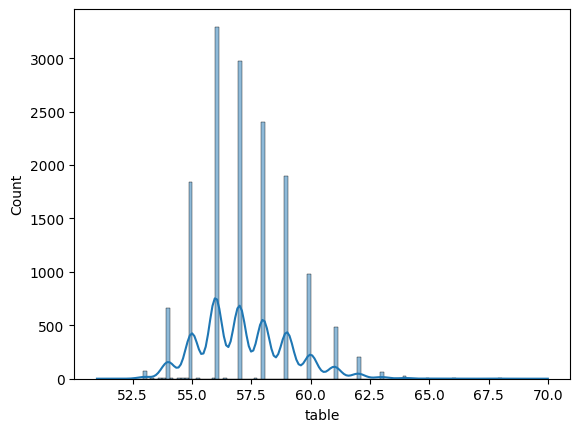

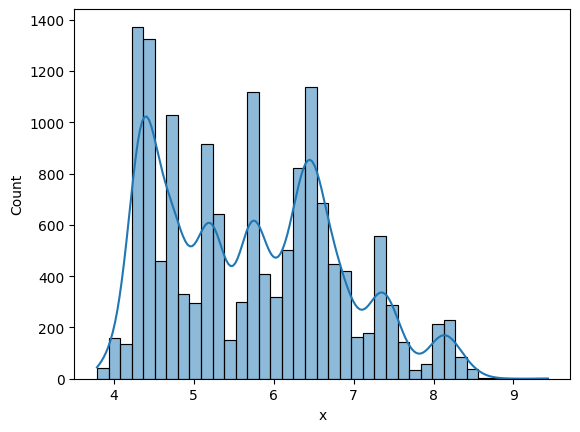

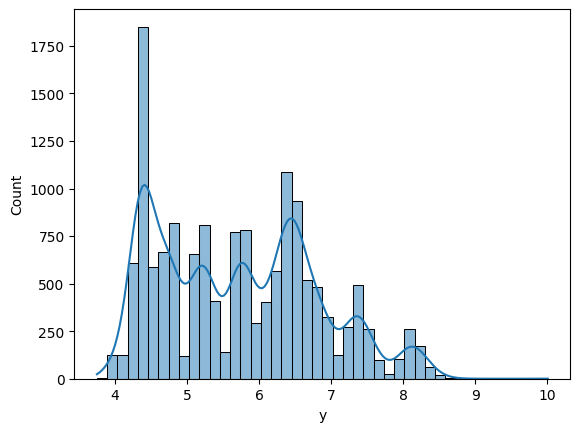

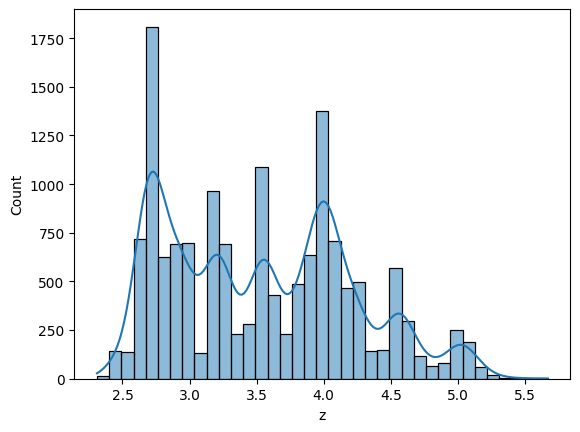

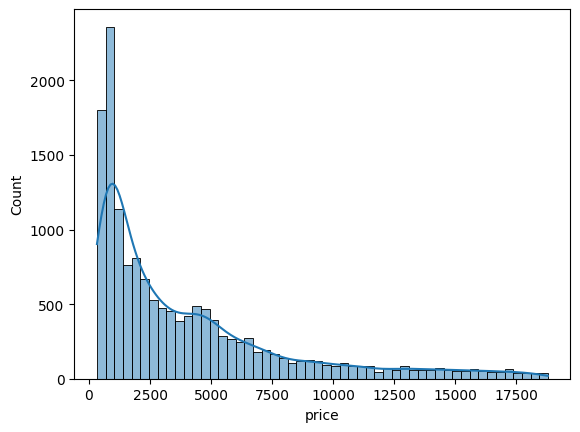

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
x=0
for i in numerical_columns:
    sns.histplot(data=df, x=i,kde=True)
    print("\n")
    plt.show()

In [47]:
df[categorical_columns]

,cut,color,clarity
80639,Premium,E,SI1
180511,Premium,I,VS1
163826,Ideal,F,SI2
146615,Ideal,D,VS2
74483,Ideal,I,VS2
...,...,...,...
98785,Ideal,E,VS1
177564,Ideal,F,VS1
187476,Good,E,SI1
119917,Premium,G,VS1


<Figure size 800x600 with 0 Axes>

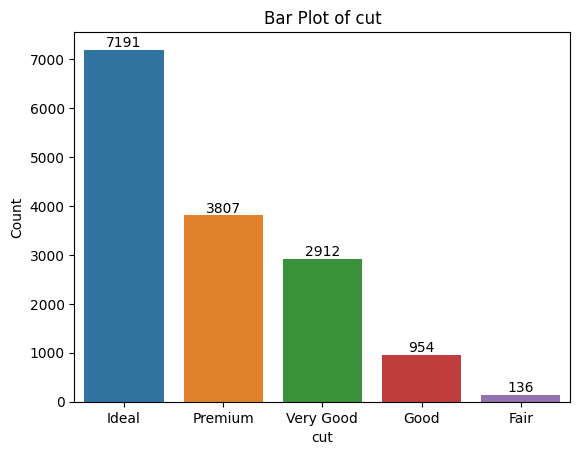

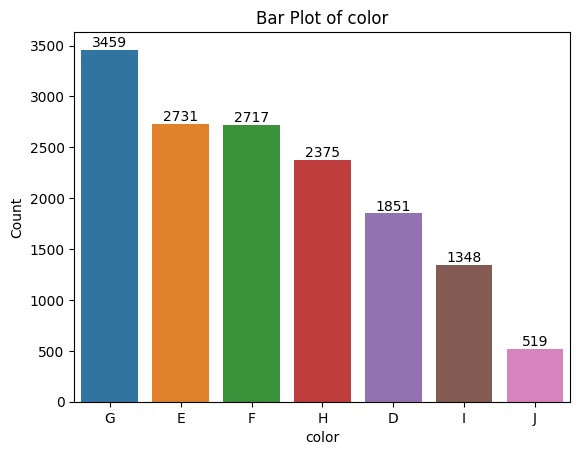

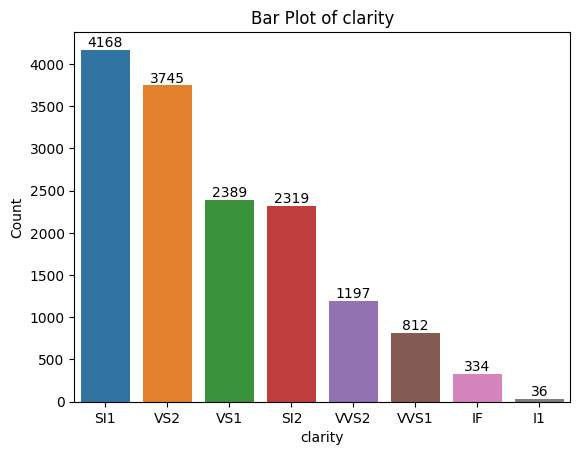

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for i in categorical_columns:
    plt.figure()
    ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {i}')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()


* Correlation between the variables:

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 80639 to 152846
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    15000 non-null  float64
 1   cut      15000 non-null  object 
 2   color    15000 non-null  object 
 3   clarity  15000 non-null  object 
 4   depth    15000 non-null  float64
 5   table    15000 non-null  float64
 6   x        15000 non-null  float64
 7   y        15000 non-null  float64
 8   z        15000 non-null  float64
 9   price    15000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


<Axes: >

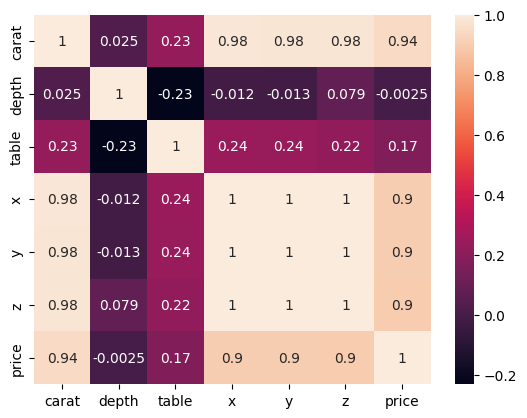

In [67]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [68]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [76]:
df['cut'].unique()

array(['Premium', 'Ideal', 'Very Good', 'Good', 'Fair'], dtype=object)

In [77]:
# encoding: using mapping
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [78]:
df['clarity'].unique()

array(['SI1', 'VS1', 'SI2', 'VS2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [79]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [80]:
df['color'].unique()

array(['E', 'I', 'F', 'D', 'H', 'G', 'J'], dtype=object)

In [81]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [82]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [84]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
80639,0.33,4,2,3,62.6,59.0,4.40,4.45,2.77,743
180511,0.72,4,6,5,61.1,56.0,5.82,5.77,3.54,2564
163826,0.72,5,3,2,61.3,56.0,5.76,5.74,3.52,2364
146615,0.56,5,1,4,60.7,56.0,5.33,5.37,3.25,1963
74483,1.70,5,6,4,61.2,55.0,7.67,7.62,4.66,10872
